# Workspace Notebook for Ventral Contours Figures

### Authors
* Noah C. Benson
* ...
* Jonathan Winawer

## Configuration

In [4]:
# Change this to match where you have these data on your computer.
surface_areas_filename = '~/code/hcp-annot-vc_data/save/surface_areas.csv'

## Initialization

In [5]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns

import neuropythy as ny

### Load the Data

In [6]:
# read data and exclude "mean" rater
data = pd.read_csv(surface_areas_filename)
data = data[data['rater'] != 'mean']
data.sid = data.sid.astype(str)
data.set_index('sid')

data_lh = data[data['hemisphere'] == 'lh']
data_rh = data[data['hemisphere'] == 'rh']

## Figures

The code below in this section is for making the figures of the paper.

### ICC Plot

In [14]:
all_rater_ids = np.unique(data['rater'])
all_raters = []
for rater in all_rater_ids:
    df = data[data['rater'] == rater]
    all_raters.append(df)

In [20]:
# #TODO: Figure out why the ordering returned by find_order doesn't
#        work in the plot_percent_area function.
def find_order(data, hemi, roi):
    """Returns a list of subject IDs in order of their surface area.
    
    Given a hemisphere ('lh' or 'rh') and an ROI name (like 'hV4'),
    sorts all subjects according to the surface area of the ROI in the
    requested hemisphere and returns the subject IDs in that order.
    """
    df = data
    df = df[df['hemisphere'] == hemi]
    
    df = df.groupby(['sid'], as_index = False).mean()
    df = df.sort_values(roi)
    
    df [roi + '_percent'] = df [roi] / df ['cortex']
    df = df.sort_values(roi + '_percent')
    
    order = df['sid'].values
    return order

In [23]:
def plot_percent_area(sarea, hemi, roi, order):
    """Plots the percentage of cortical surface area for the given roi and hemisphere.
    
    The ordering of the plots is given by the order parameter.
    """
    sarea_hemi = sarea[sarea['hemisphere'] == hemi]
    sarea_roi = sarea_hemi[roi] 

    # sort sid
    sarea_roi = sarea_roi.loc[order]
    sarea_cortex = sarea_roi['cortex']
    sarea_percent = sarea_roi[roi] / sarea_cortex * 100

    plt.scatter(range(len(sarea_percent)), sarea_percent, s=8)

In [31]:
def plot_all (data, sarea, hemi):
    order = find_order(data, hemi, sarea)
    for rater in all_raters:
        plot_percent_area(data, hemi, sarea, order)

## LH hV4

In [32]:
plot_all (data, 'hV4', 'lh')

['204521' '115017' '176542' '177645' '757764' '958976' '318637' '125525'
 '181636' '320826' '177140' '130518' '221319' '169343' '898176' '706040'
 '214019' '671855' '436845' '770352' '195041' '818859' '406836' '536647'
 '365343' '187345' '165436' '209228' '562345' '782561' '200311' '167036'
 '644246' '724446' '182739' '573249' '196144' '901442' '205220' '385046'
 '115825' '899885' '871762' '246133' '783462' '330324' '173334' '134829'
 '128935' '973770' '429040' '585256' '627549' '111514' '765864' '118225'
 '814649' '146432' '159239' '169444' '541943' '617748' '654552' '395756'
 '175237' '185442' '552241' '167440' '116726' '360030' '104416' '257845'
 '157336' '389357' '732243' '156334' '111312' '825048' '193845' '109123'
 '380036' '910241' '191336' '144226' '169040' '164131' '172130' '100610'
 '171633' '203418' '926862' '352738' '145834' '137128' '239136' '126426'
 '971160' '146129' '158136' '263436' '878877' '134627' '346137' '927359'
 '192439' '249947' '951457' '966975' '162935' '2015

KeyError: "None of [Index(['204521', '115017', '176542', '177645', '757764', '958976', '318637',\n       '125525', '181636', '320826',\n       ...\n       '943862', '397760', '108323', '789373', '995174', '214524', '381038',\n       '105923', '186949', '102816'],\n      dtype='object', length=181)] are in the [index]"

## RH hV4

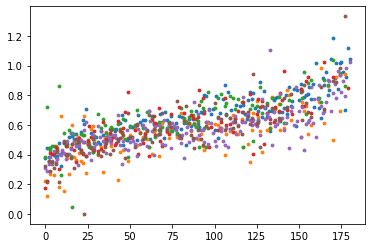

In [9]:
plot_all ('hV4', 'rh')

## LH VO1

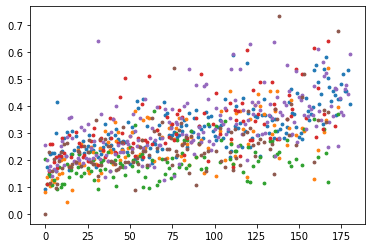

In [10]:
plot_all ('VO1', 'lh')

## RH VO1

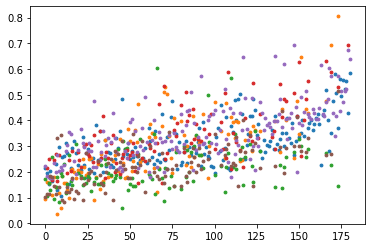

In [11]:
plot_all ('VO1', 'rh')

## LH VO2

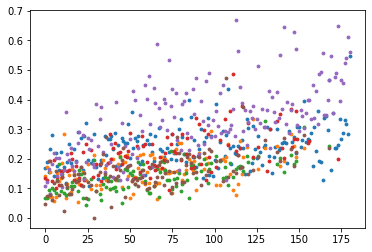

In [12]:
plot_all ('VO2', 'lh')

## RH VO2

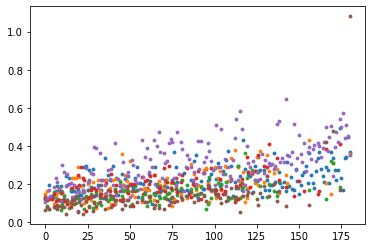

In [13]:
plot_all ('VO2', 'rh')

# Find Abnormal Values

In [14]:
cortex = data_lh ['cortex']

In [15]:
data

,hV4,VO2,VO1,cortex,rater,sid,hemisphere,message
0,781.737434,303.489328,100.468879,107230.953125,BrendaQiu,100610,lh,"OKAY: ('BrendaQiu', 100610, 'lh', '/home/nben/..."
1,653.491056,359.608152,113.126526,108015.562500,BrendaQiu,100610,rh,"OKAY: ('BrendaQiu', 100610, 'rh', '/home/nben/..."
2,584.953536,333.010054,183.841560,99291.320312,BrendaQiu,102311,lh,"OKAY: ('BrendaQiu', 102311, 'lh', '/home/nben/..."
3,808.426349,276.758045,427.680084,100608.046875,BrendaQiu,102311,rh,"OKAY: ('BrendaQiu', 102311, 'rh', '/home/nben/..."
4,961.528820,215.701942,392.237191,91761.718750,BrendaQiu,102816,lh,"OKAY: ('BrendaQiu', 102816, 'lh', '/home/nben/..."
...,...,...,...,...,...,...,...,...
2167,NaN,NaN,NaN,NaN,jennifertepan,971160,rh,"FAIL: ('jennifertepan', 971160, 'rh', '/home/n..."
2168,408.623739,128.283986,318.966697,100280.296875,jennifertepan,973770,lh,"OKAY: ('jennifertepan', 973770, 'lh', '/home/n..."
2169,467.301111,154.894417,272.885772,102054.054688,jennifertepan,973770,rh,"OKAY: ('jennifertepan', 973770, 'rh', '/home/n..."
2170,NaN,NaN,NaN,NaN,jennifertepan,995174,lh,"FAIL: ('jennifertepan', 995174, 'lh', '/home/n..."


In [57]:
zero_rating = {'rater': [],
              'sid': [],
              'hemisphere': [],
              'roi': []}

for index, row in data.iterrows():
    for roi in ['hV4', 'VO1', 'VO2']:
        if row [roi] / row ['cortex'] * 100 < 0.01:
            zero_rating ['rater'].append (row ['rater'])
            zero_rating ['sid'].append (row ['sid'])
            zero_rating ['hemisphere'].append (row ['hemisphere'])
            zero_rating ['roi'].append (roi)
            
zero_rating = pd.DataFrame (zero_rating)
#nan_rating.to_csv('/Users/Brenda/data/hcp/zero_ratings.csv', index = False)

In [58]:
zero_rating

,rater,sid,hemisphere,roi
0,JiyeongHa,212419,lh,hV4
1,JiyeongHa,145834,rh,hV4
2,JiyeongHa,204521,lh,hV4
3,BrendaQiu,115017,lh,hV4
4,JiyeongHa,169040,rh,hV4
5,JiyeongHa,169040,rh,VO2
6,JiyeongHa,818859,rh,VO2
7,jennifertepan,818859,rh,VO2
8,jennifertepan,140117,rh,VO2
9,nourahboujaber,395756,rh,VO2


## Workspace

In [7]:
sub = ny.hcp_subject(111312)

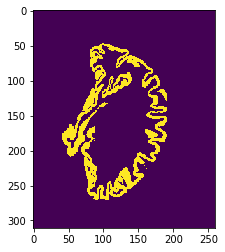

In [13]:
plt.imshow(sub.rh_gray_mask.dataobj[100])

In [14]:
sub.lh

Cortex(<LH>, <245778 faces>, <122891 vertices>)

In [20]:
ny.cortex_plot(sub.lh, surface='sphere', color='prf_polar_angle',
               mask=('prf_variance_explained', 0.1, 1))

Figure(camera=PerspectiveCamera(fov=0.644570721372708, position=(0.0, -100.0, 0.0), projectionMatrix=(1.0, 0.0…

In [21]:
sorted(sub.lh.properties.keys())

['BA1_label',
 'BA1_weight',
 'BA2_label',
 'BA2_weight',
 'BA3a_label',
 'BA3a_weight',
 'BA3b_label',
 'BA3b_weight',
 'BA44_label',
 'BA44_weight',
 'BA45_label',
 'BA45_weight',
 'BA4a_label',
 'BA4a_weight',
 'BA4p_label',
 'BA4p_weight',
 'BA6_label',
 'BA6_weight',
 'DKT40_parcellation',
 'Desikan06_parcellation',
 'Deskian06_parcellation',
 'Destrieux09_parcellation',
 'MT_label',
 'MT_weight',
 'V1_label',
 'V1_weight',
 'V2_label',
 'V2_weight',
 'areal_distortion',
 'atlas_curvature',
 'atlas_label',
 'brodmann_area',
 'brodmann_area_wide',
 'convexity',
 'cortex_label',
 'curvature',
 'entorhinal_label',
 'entorhinal_weight',
 'highres-prf_eccentricity',
 'highres-prf_gain',
 'highres-prf_mean_signal',
 'highres-prf_polar_angle',
 'highres-prf_radius',
 'highres-prf_variance_explained',
 'highres-prf_x',
 'highres-prf_y',
 'index',
 'jacobian_norm',
 'label',
 'lowres-prf_eccentricity',
 'lowres-prf_gain',
 'lowres-prf_mean_signal',
 'lowres-prf_polar_angle',
 'lowres-prf_r

/home/nben/.conda/envs/nben/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nben/.conda/envs/nben/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([95282.,  7075.,  2950.,  1647.,  1486.,  1381.,  1474.,  1799.,
         1765.,   420.]),
 array([-1.1920929e-07,  8.0417417e-02,  1.6083495e-01,  2.4125250e-01,
         3.2167003e-01,  4.0208757e-01,  4.8250511e-01,  5.6292266e-01,
         6.4334017e-01,  7.2375774e-01,  8.0417526e-01], dtype=float32),
 <a list of 10 Patch objects>)

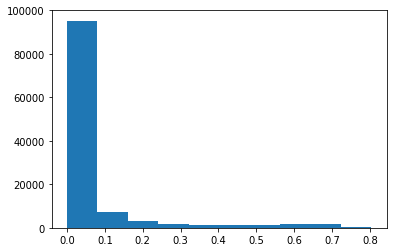

In [24]:
varexp = sub.lh.properties['prf_variance_explained']
plt.hist(varexp)

In [25]:
varexp = sub.lh.properties['prf_variance_explained']
mask = (varexp > 0.1)

ny.cortex_plot(sub.lh, surface='sphere', color='prf_polar_angle',
               mask=mask)

<ipython-input-25-1ad62b7e9744>:2: RuntimeWarning: invalid value encountered in greater
  mask = (varexp > 0.1)


Figure(camera=PerspectiveCamera(fov=0.644570721372708, position=(0.0, -100.0, 0.0), projectionMatrix=(1.0, 0.0…

In [26]:
flatmap = ny.to_flatmap('occipital_pole', sub.lh)

In [27]:
flatmap

Mesh(<2D>, <58908 faces>, <29661 vertices>)

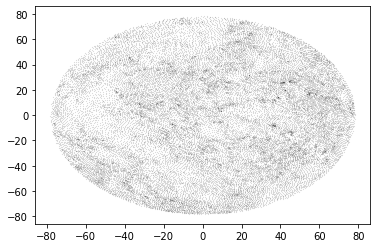

In [31]:
plt.plot(flatmap.coordinates[0], flatmap.coordinates[1], 'k.', ms=0.1)

(-85.9538884595322, 85.96439483837472, -85.91760621417484, 85.9630767521128)

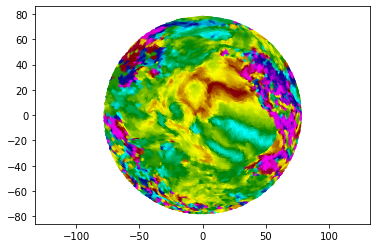

In [42]:
ny.cortex_plot(flatmap, color='prf_polar_angle')

plt.gca().axis('equal')

In [58]:
import pandas as pd

surface_areas = pd.read_csv('/data/crcns2021/ventral-results/surface_areas_2022-02-27.csv')

In [59]:
surface_areas

,hV4,VO2,VO1,cortex,rater,sid,hemisphere,message
0,781.737434,303.489328,100.468879,107230.953125,BrendaQiu,100610,lh,"OKAY: ('BrendaQiu', 100610, 'lh', '/home/nben/..."
1,653.491056,359.608152,113.126526,108015.562500,BrendaQiu,100610,rh,"OKAY: ('BrendaQiu', 100610, 'rh', '/home/nben/..."
2,584.953536,333.010054,183.841560,99291.320312,BrendaQiu,102311,lh,"OKAY: ('BrendaQiu', 102311, 'lh', '/home/nben/..."
3,808.426349,276.758045,427.680084,100608.046875,BrendaQiu,102311,rh,"OKAY: ('BrendaQiu', 102311, 'rh', '/home/nben/..."
4,961.528820,215.701942,392.237191,91761.718750,BrendaQiu,102816,lh,"OKAY: ('BrendaQiu', 102816, 'lh', '/home/nben/..."
...,...,...,...,...,...,...,...,...
2529,438.137002,372.840134,338.342374,107826.226562,mean,971160,rh,"OKAY: ('mean', 971160, 'rh', '/home/nben/code/..."
2530,NaN,NaN,NaN,NaN,mean,973770,lh,"FAIL: ('mean', 973770, 'lh', '/home/nben/code/..."
2531,571.644068,236.984545,303.880580,102054.054688,mean,973770,rh,"OKAY: ('mean', 973770, 'rh', '/home/nben/code/..."
2532,NaN,NaN,NaN,NaN,mean,995174,lh,"FAIL: ('mean', 995174, 'lh', '/home/nben/code/..."


In [60]:
import neuropythy as ny

ny.data['hcp']

Dataset('hcp')

In [61]:
d = {'a': 1, 'b': 2}
d['b']

2

In [62]:
dataset = ny.data['hcp_lines']

In [65]:
dataset.surface_area_dataframe

,sid,anatomist,roiLV2d,roiLV1d,roiLV1,roiLV3v,roiLV2v,roiLV3d,roiLV2fov,roiLV1v,roiLV1fov,roiLV3fov,roiLV3,roiLV3nonfov,roiLV2nonfov,roiLV1nonfov,roiLfoveal,roiLV2,roiRV2d,roiRV1d,roiRV1,roiRV3v,roiRV2v,roiRV3d,roiRV2fov,roiRV1v,roiRV1fov,roiRV3fov,roiRV3,roiRV3nonfov,roiRV2nonfov,roiRV1nonfov,roiRfoveal,roiRV2,sctLV1d3,sctLV2d3,sctLV2d1,sctLV1v0,sctLV1d4,sctLV3d2,...,sctRV1v3,sctRV2d4,sctRV1v1,sctRV1d0,sctRV3v1,sctRV1v4,sctRV2v1,sctRV2v3,sctRV3d1,sctRV3v3,sctRV2v2,sctRV3v4,sctRV1d1,sctRV1v2,sctRV2d2,sctRV3v2,sctRV1d2,sctRV3d4,lblLCalc,lblLB14V3,lblLV1,lblLH,lblLB14V2,lblLV2,lblLBA44,lblLBA3b,lblLMT,lblLB14V1,lblLBA45,lblRCalc,lblRB14V3,lblRV1,lblRH,lblRB14V2,lblRV2,lblRBA44,lblRBA3b,lblRMT,lblRB14V1,lblRBA45
0,100610,A1,625.232165,940.375397,2265.887920,439.663239,763.709808,431.534629,391.098838,1108.252389,215.637165,272.479088,1143.821972,871.342884,1389.074456,2050.250755,879.087679,1780.173294,612.234203,949.143362,1913.956563,411.662573,583.990772,717.957514,270.387744,742.996303,222.747767,335.769455,1465.402690,1129.633235,1196.306118,1691.208796,828.904948,1466.693863,314.800264,182.655020,64.518362,96.538101,356.538195,91.517719,...,240.701285,155.984061,113.348566,93.286937,72.939826,190.882032,82.724728,139.598664,157.486292,86.430518,171.775185,120.408226,118.306797,198.472225,167.595194,132.228708,210.585039,287.027299,2335.325439,959.267578,3740.237549,107230.953125,1458.998291,3419.578857,1098.299316,1182.486084,390.283264,1526.992920,1236.778809,2277.499512,935.514954,3805.436035,108015.562500,1213.245483,3781.616943,575.201660,1310.303101,256.764954,1705.284546,919.701111
1,100610,A2,563.988023,1005.324972,2240.237938,485.767131,766.007411,401.611100,331.172632,1052.816517,182.824199,339.697565,1227.444715,887.747150,1329.995416,2057.413739,853.694349,1661.168048,754.631945,853.107265,1875.902653,428.677640,612.753950,437.676067,379.109785,790.631521,232.163752,257.937057,1124.642891,866.705834,1367.557893,1643.738902,869.210603,1746.667678,303.724482,130.259975,83.141918,38.108127,309.423403,109.932646,...,230.171872,229.795630,146.129631,82.560983,104.455458,224.716306,95.956435,193.634469,109.047797,125.000188,137.925401,112.152197,127.443936,189.613735,185.882962,87.480228,242.552623,133.826201,2335.325439,959.267578,3740.237549,107230.953125,1458.998291,3419.578857,1098.299316,1182.486084,390.283264,1526.992920,1236.778809,2277.499512,935.514954,3805.436035,108015.562500,1213.245483,3781.616943,575.201660,1310.303101,256.764954,1705.284546,919.701111
2,100610,A3,532.841806,962.803704,2174.752668,348.295754,681.672775,439.806920,352.150820,895.453589,316.691018,297.798785,1085.699232,787.900447,1214.588634,1858.061651,967.660201,1566.739454,720.447595,905.954959,1887.691812,359.061362,526.659661,303.718624,326.042801,780.296392,201.440454,456.770680,1119.448009,662.677329,1247.124963,1686.251357,984.253902,1573.167764,361.525286,193.765050,65.523146,111.322182,259.743967,140.384776,...,214.244700,228.862533,152.222180,68.477779,64.486180,187.524780,64.358200,143.571892,56.723444,100.285566,123.729484,96.380986,129.643184,227.250326,175.612705,98.109856,238.687967,75.895329,2335.325439,959.267578,3740.237549,107230.953125,1458.998291,3419.578857,1098.299316,1182.486084,390.283264,1526.992920,1236.778809,2277.499512,935.514954,3805.436035,108015.562500,1213.245483,3781.616943,575.201660,1310.303101,256.764954,1705.284546,919.701111
3,100610,A4,634.859038,938.548148,2105.550586,381.879585,761.057306,436.562631,493.901446,997.108593,170.305941,248.286764,1066.602000,818.315236,1395.916340,1935.244645,913.284701,1889.817786,736.666294,936.945533,1788.785728,400.532100,649.359150,399.125129,474.849064,700.611693,151.228563,318.120916,1117.008663,798.887747,1386.286885,1637.557165,943.673131,1861.135949,327.106579,197.567089,108.985400,23.446054,310.575743,90.191172,...,192.294635,236.366249,91.514697,56.540405,101.370225,214.485389,134.312332,129.575364,40.089492,90.180991,169.123254,91.489689,114.215836,202.7

In [ ]:
# What we care about:
# - roiLV1, roiRV1 (left and right V1 surface areas)
# - roiLV2, roiRV2
# - roiLV3, roiRV3

In [66]:
v123_data = dataset.surface_area_dataframe
v123_data = v123_data[['sid', 'anatomist', 'roiLV1', 'roiRV1', 'roiLV2', 'roiRV2', 'roiLV3', 'roiRV3']]
v123_data

,sid,anatomist,roiLV1,roiRV1,roiLV2,roiRV2,roiLV3,roiRV3
0,100610,A1,2265.887920,1913.956563,1780.173294,1466.693863,1143.821972,1465.402690
1,100610,A2,2240.237938,1875.902653,1661.168048,1746.667678,1227.444715,1124.642891
2,100610,A3,2174.752668,1887.691812,1566.739454,1573.167764,1085.699232,1119.448009
3,100610,A4,2105.550586,1788.785728,1889.817786,1861.135949,1066.602000,1117.008663
4,100610,mean,2182.648869,1860.693153,1728.088569,1659.008599,1119.816370,1172.995850
...,...,...,...,...,...,...,...,...
900,901442,A1,1056.869804,1112.422321,1030.024885,981.976593,793.845552,1008.520810
901,901442,A2,1127.332789,1092.132772,1027.452077,986.305241,815.575845,1052.124268
902,901442,A3,1059.241535,1090.585286,896.018515,966.060233,867.339504,917.979071
903,901442,A4,1042.011606,1034.806269,974.529336,1058.982934,758.805122,1000.117598


In [67]:
v123_mean_data = v123_data[v123_data['anatomist'] == 'mean']
v123_mean_data

,sid,anatomist,roiLV1,roiRV1,roiLV2,roiRV2,roiLV3,roiRV3
4,100610,mean,2182.648869,1860.693153,1728.088569,1659.008599,1119.816370,1172.995850
9,118225,mean,1979.312683,2051.494042,1669.270603,1849.540834,1064.189967,1352.400127
14,140117,mean,1153.694862,1116.527387,1118.138452,1207.856324,872.083832,865.760388
19,158136,mean,1231.193647,1205.712993,1271.163609,1355.516790,1001.229745,1008.570664
24,172130,mean,1022.975665,1022.367207,1164.040613,1111.529883,886.230702,782.037635
...,...,...,...,...,...,...,...,...
884,406836,mean,1444.961363,1273.361188,1335.570071,1290.200584,1114.681135,1045.837380
889,572045,mean,1136.901352,974.767644,1026.256552,870.247724,875.898848,904.958032
894,706040,mean,NaN,808.052458,NaN,773.187416,NaN,691.081453
899,818859,mean,1338.753442,1381.183600,1248.840014,1237.964415,1060.750740,944.633979


NameError: name 'subject_list_2' is not defined

In [97]:
path = '/data/crcns2021/results/data_branch/save/BrendaQiu'

sid = 100610
h = 'lh'

sub = ny.data['hcp_lines'].subjects[sid]
hem = sub.hemis[h]

labels = ny.load(f'{path}/{h}_{sid}.mgz')

ny.cortex_plot(hem, surface='inflated', color=labels)

Figure(camera=PerspectiveCamera(fov=0.644570721372708, position=(0.0, -100.0, 0.0), projectionMatrix=(1.0, 0.0…